# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [57]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree

In [58]:
housing_data = pd.read_csv('housing.csv')

In [59]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [60]:
#Lendo arquivo
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [61]:
# Para remover linhas com valores nulos
housing_data = housing_data.dropna()

In [62]:
#As colunas de texto devem ser convertidas em variáveis ​​categóricas ou numéricas.
housing_data = pd.get_dummies(housing_data)
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False


In [63]:
# Definir variável alvo (target) e características (features)
X = housing_data.drop('median_house_value', axis=1)
y = housing_data['median_house_value']

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

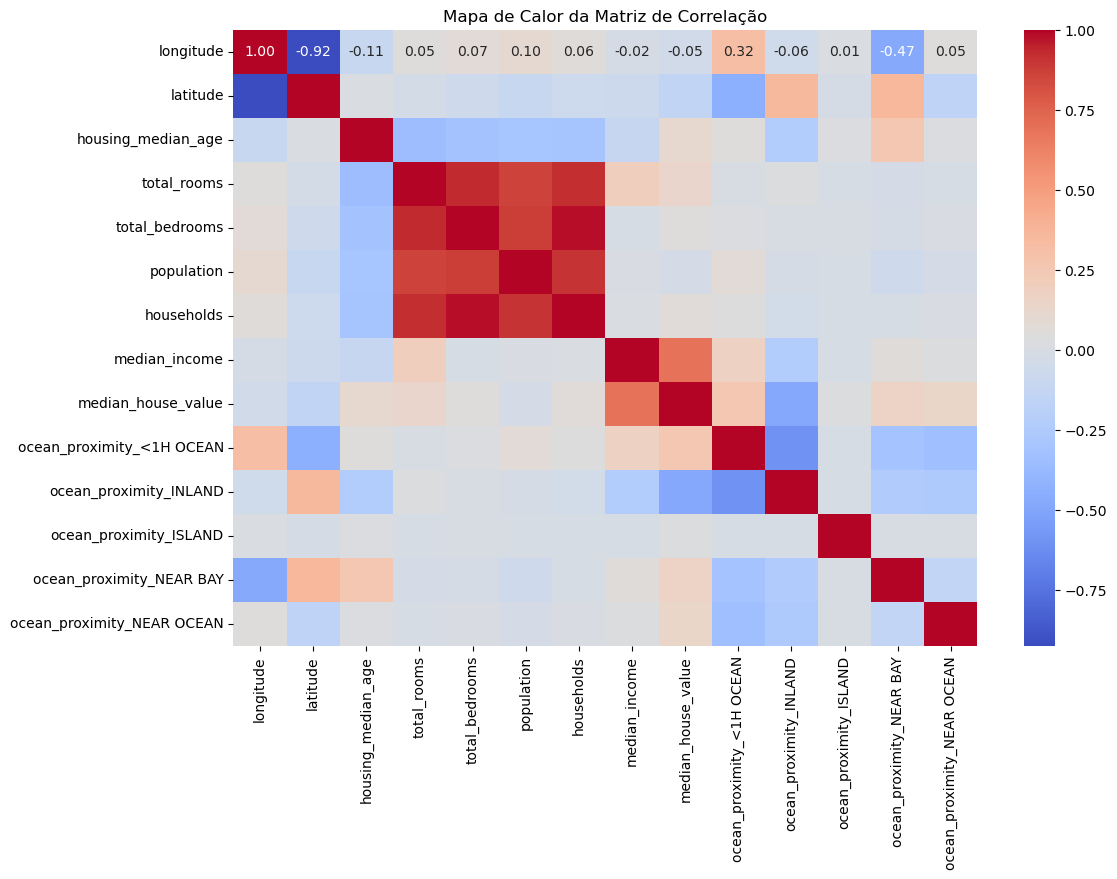

In [64]:
# Calcular a matriz de correlação
corr_matrix = housing_data.corr()

# Configurar a figura para o mapa de calor
plt.figure(figsize=(12, 8))

# Gerar o mapa de calor da matriz de correlação
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Configurar título e exibição do mapa de calor
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()

Ao analisar a matriz de correlação, podemos observar algumas variáveis que apresentam uma correlação significativa com a variável target (median_house_value):

median_income: Apresenta uma alta correlação positiva com median_house_value , indicando que a renda mediana pode ser um forte preditor do valor mediano das casas.

total_rooms: Tem uma correlação positiva moderada com median_house_value , sugerindo que áreas com mais quartos podem ter casas de maior valor.

households: Mostra uma correlação positiva moderada com median_house_value , embora menos significativa que median_income.

Variáveis com correlações mais baixas ou negativas podem ter menos potencial preditivo direto, mas ainda podem contribuir para o modelo de previsão quando consideradas em conjunto com outras variáveis.

### 3. Separe os dados em validação e teste

In [65]:
# Separar features e target
X = housing_data.drop('median_house_value', axis=1)
y = housing_data['median_house_value']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar as formas dos conjuntos de treino e teste
print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

Tamanho do conjunto de treino: (16346, 13)
Tamanho do conjunto de teste: (4087, 13)


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [66]:
#Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
#Treinar a árvore com profundidade máxima = 8
tree_max_depth_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_max_depth_8.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=8, random_state=42)

In [68]:
#Treinar a árvore com profundidade máxima = 2
tree_max_depth_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_max_depth_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [69]:
y_pred_8 = tree_max_depth_8.predict(X_test)
y_pred_2 = tree_max_depth_2.predict(X_test)

mse_8 = mean_squared_error(y_test, y_pred_8)
mse_2 = mean_squared_error(y_test, y_pred_2)

print(f"Mean Squared Error (Profundidade Máxima = 8): {mse_8}")
print(f"Mean Squared Error (Profundidade Máxima = 2): {mse_2}")

Mean Squared Error (Profundidade Máxima = 8): 4073282126.9403405
Mean Squared Error (Profundidade Máxima = 2): 6916498324.432908


### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [70]:
#TReino
# Para a árvore com profundidade máxima = 8
y_train_pred_8 = tree_max_depth_8.predict(X_train)
mse_train_8 = mean_squared_error(y_train, y_train_pred_8)

# Para a árvore com profundidade máxima = 2
y_train_pred_2 = tree_max_depth_2.predict(X_train)
mse_train_2 = mean_squared_error(y_train, y_train_pred_2)

print(f"Mean Squared Error no Treinamento (Profundidade Máxima = 8): {mse_train_8}")
print(f"Mean Squared Error no Treinamento (Profundidade Máxima = 2): {mse_train_2}")

Mean Squared Error no Treinamento (Profundidade Máxima = 8): 3201632810.128702
Mean Squared Error no Treinamento (Profundidade Máxima = 2): 6688828024.524753


In [71]:
#TEste
# Para a árvore com profundidade máxima = 8
y_test_pred_8 = tree_max_depth_8.predict(X_test)
mse_test_8 = mean_squared_error(y_test, y_test_pred_8)

# Para a árvore com profundidade máxima = 2
y_test_pred_2 = tree_max_depth_2.predict(X_test)
mse_test_2 = mean_squared_error(y_test, y_test_pred_2)

print(f"Mean Squared Error no Teste (Profundidade Máxima = 8): {mse_test_8}")
print(f"Mean Squared Error no Teste (Profundidade Máxima = 2): {mse_test_2}")

Mean Squared Error no Teste (Profundidade Máxima = 8): 4073282126.9403405
Mean Squared Error no Teste (Profundidade Máxima = 2): 6916498324.432908


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

 A árvore de profundidade 2 é a mais adequada porque a de modelos mais profundos são mais complexos e podem ser mais difíceis de interpretar.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

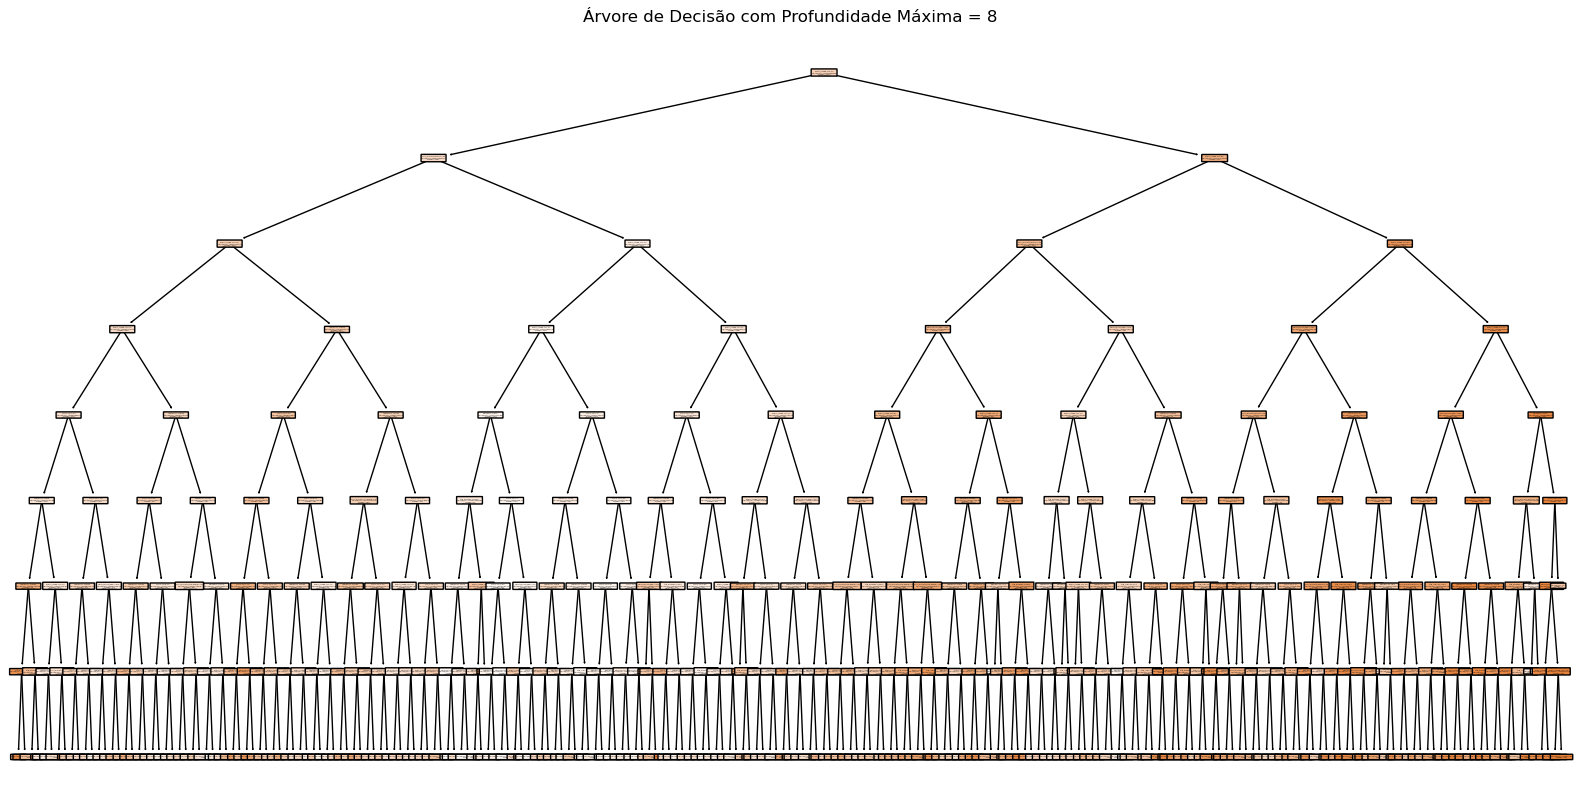

In [78]:
# Plotar a árvore com profundidade máxima = 8
plt.figure(figsize=(20, 10))
plot_tree(tree_max_depth_8, filled=True, feature_names=X.columns, rounded=True)
plt.title('Árvore de Decisão com Profundidade Máxima = 8')
plt.show()

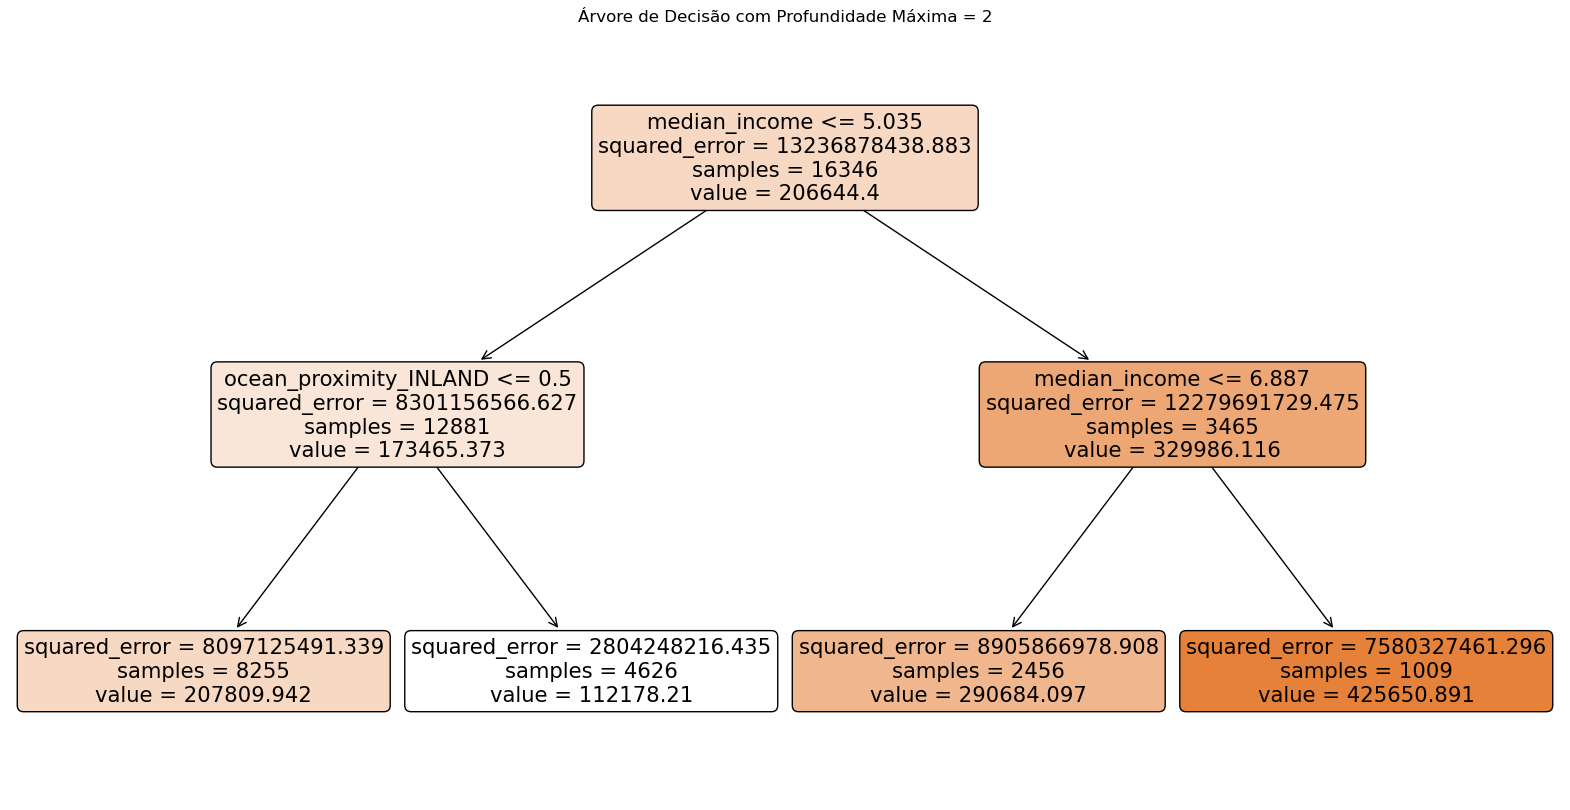

In [79]:
# Plotar a árvore com profundidade máxima = 2
plt.figure(figsize=(20, 10))
plot_tree(tree_max_depth_2, filled=True, feature_names=X.columns, rounded=True)
plt.title('Árvore de Decisão com Profundidade Máxima = 2')
plt.show()

Foi o median_house_value que foi utilizado como alvo na construção da árvore depois o median_income.